# Importar imagenes propias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [2]:


="C:/Users/User/Pictures/Platanos" #definir la direccion
CATEGORIES =["Verde", "Danado", "Maduro"] #nombre de las carpetas

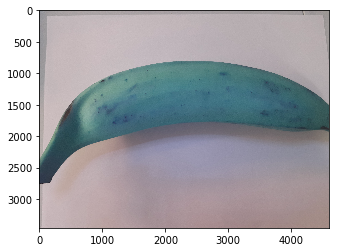

In [3]:
#entra en cada carpeta y guarda las imagenes en un arreglo 
for  category in CATEGORIES:
    path=os.path.join(DATADIR, category)#accede dentro de cada carpeta de PetImages y crea una nueva direccion
    for img in os.listdir(path): #recorre cada imagen
        arreglo= cv2.imread(os.path.join(path, img)) #direccion completa de cada imagen
        plt.imshow(arreglo)
        plt.show()
        break
    break

Se coloca en escala de grises porque el tamaño disminuye 3 veces y el arreglo se vuelve 2d. Sino el arreglo se vuelve de mas dimensiones RGB

In [4]:
print(arreglo)



[[[148 150 158]
  [146 148 156]
  [143 145 153]
  ...
  [161 154 151]
  [162 155 152]
  [162 155 152]]

 [[146 148 156]
  [144 146 154]
  [142 144 152]
  ...
  [159 152 149]
  [160 153 150]
  [161 154 151]]

 [[142 144 152]
  [141 143 151]
  [141 143 151]
  ...
  [159 152 149]
  [162 155 152]
  [164 157 154]]

 ...

 [[178 166 166]
  [176 164 164]
  [175 163 163]
  ...
  [161 136 132]
  [165 140 136]
  [165 140 136]]

 [[177 165 165]
  [174 162 162]
  [174 162 162]
  ...
  [162 137 133]
  [165 140 136]
  [166 141 137]]

 [[176 164 164]
  [174 162 162]
  [174 162 162]
  ...
  [162 137 133]
  [164 139 135]
  [165 140 136]]]


In [5]:
#tamaño del arreglo
print("(Cantidad de imagenes, Cantidad de elementos en cada arreglo o pixeles): ",arreglo.shape, "\n\n")
print(arreglo[1])

(Cantidad de imagenes, Cantidad de elementos en cada arreglo o pixeles):  (3456, 4608, 3) 


[[146 148 156]
 [144 146 154]
 [142 144 152]
 ...
 [159 152 149]
 [160 153 150]
 [161 154 151]]


Es importante que todas las imagenes tengan el mismo tamano y forma para que se facilite el proceso

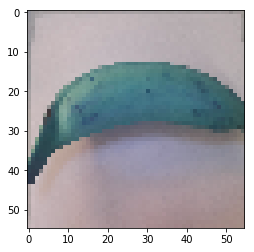

In [6]:
size= 55
nuevo_arreglo= cv2.resize(arreglo,(size,size))
plt.imshow(nuevo_arreglo)
plt.show()


# Crear el training data
Debo iterar por todo lo que se ha hecho

In [7]:
training_data=[]
def create_training_data():
    for  category in CATEGORIES:
        path=os.path.join(DATADIR, category)#accede dentro de cada carpeta de PetImages y crea una nueva direccion
        class_num= CATEGORIES.index(category) #define el inidice del arreglo para el resultado final   
        
        for img in tqdm(os.listdir(path)): #recorre cada imagen
            try:
                arreglo= cv2.imread(os.path.join(path, img)) #direccion completa de cada imagen
                nuevo_arreglo= cv2.resize(arreglo,(size,size))
                training_data.append([nuevo_arreglo, class_num])
            except Exception as e:
                pass

create_training_data()

100%|██████████| 650/650 [02:42<00:00,  4.85it/s]


In [8]:
#cantidad de samples que tiene
print(len(training_data))

1950


Es IMPORTANTE tener la data balanceada, es decir la misma cantidad de muestras. 

La data en **training_data** esta almacenada en orden, primero TODOS perros y luego TODOS gatos.  Lo que no es eficiente para el aprendizaje , hay que randomizar la data

In [9]:
import random
random.shuffle(training_data)

In [10]:
#para verificar si se shuffleo
for sample in training_data[:1000]:
    print(sample[1]) #imprime la clase, porque [imagen_matriz,labels]

0
0
2
2
0
2
0
0
0
1
0
1
1
2
2
2
1
1
0
0
2
0
0
1
0
0
1
2
0
0
1
0
2
1
0
0
1
0
0
1
2
1
2
1
1
0
1
0
0
1
0
0
0
1
2
0
0
0
0
0
2
2
1
2
1
0
1
2
1
0
1
0
2
2
1
1
2
0
0
2
0
0
2
1
0
2
2
0
0
0
1
1
1
1
0
1
0
1
2
0
0
0
0
1
1
2
1
0
1
0
2
0
2
1
2
0
0
2
2
0
2
1
2
0
0
1
0
1
1
0
2
1
0
2
2
1
1
2
1
2
0
0
2
0
1
0
0
0
2
2
2
0
0
0
1
2
2
1
0
1
2
1
1
2
1
1
2
1
1
1
2
2
2
2
2
0
1
2
1
2
0
0
0
1
2
1
0
0
2
1
2
0
2
2
1
2
0
2
2
2
2
2
1
1
0
0
0
1
0
2
0
1
2
1
2
2
1
0
1
1
0
1
0
2
1
1
2
0
2
0
1
0
0
2
0
2
1
0
1
1
2
0
2
0
0
2
2
1
2
2
0
0
1
1
1
1
0
1
2
2
0
2
2
0
2
2
0
1
1
1
1
0
0
0
1
0
1
0
2
1
0
1
1
0
2
1
1
2
1
0
2
2
1
2
0
1
1
2
2
0
0
2
1
2
0
1
1
2
2
2
2
0
2
1
2
0
1
0
1
2
2
2
2
2
0
2
1
1
2
2
2
0
1
1
0
0
1
0
2
1
2
2
2
1
2
2
1
0
1
2
0
1
0
0
2
1
2
1
2
0
1
1
1
2
0
0
0
2
2
1
0
1
2
1
0
0
2
0
0
0
1
1
0
2
0
0
2
1
0
0
0
2
1
0
1
0
2
2
1
0
1
0
1
2
1
0
2
0
0
0
0
0
2
2
2
0
0
0
2
0
1
2
2
0
1
1
1
2
2
0
2
2
1
2
0
0
0
2
2
2
0
1
0
0
0
0
1
1
2
2
1
1
1
0
1
2
0
1
1
0
1
1
0
1
0
1
0
0
1
2
1
2
0
2
1
1
2
2
0
1
1
0
2
2
1
0
0
2
0
2
1
1
2
0
0
0
1
1
2
2


# Crear el modelo

In [11]:
x=[]
y=[]

In [12]:
for features, labels in training_data:
    x.append(features)
    y.append(labels)

print(x[0].reshape(-1, size, size, 3))

x= np.array(x).reshape(-1, size,size, 3) #si fuera a color se coloca 3

[[[[190 195 199]
   [193 197 198]
   [194 197 201]
   ...
   [168 174 179]
   [168 173 176]
   [171 176 179]]

  [[193 197 198]
   [193 198 201]
   [193 197 198]
   ...
   [177 178 182]
   [173 177 178]
   [172 179 182]]

  [[192 195 199]
   [194 198 199]
   [193 196 200]
   ...
   [179 182 187]
   [173 177 182]
   [174 179 182]]

  ...

  [[171 175 180]
   [172 175 180]
   [171 175 180]
   ...
   [163 167 172]
   [164 168 173]
   [166 169 177]]

  [[172 175 180]
   [171 175 180]
   [170 175 178]
   ...
   [159 161 169]
   [161 164 172]
   [165 168 176]]

  [[170 173 178]
   [173 176 180]
   [172 177 180]
   ...
   [163 165 173]
   [163 166 171]
   [164 170 175]]]]


# Guardar la data

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3)

In [20]:
import pickle
pickle_out= open("modelo1/xtrain", "wb")
pickle.dump(xtrain, pickle_out)
pickle_out.close()

pickle_out= open("modelo1/ytrain", "wb")
pickle.dump(ytrain, pickle_out)
pickle_out.close()


pickle_out= open("modelo1/xtest", "wb")
pickle.dump(xtest, pickle_out)
pickle_out.close()


pickle_out= open("modelo1/ytest", "wb")
pickle.dump(ytest, pickle_out)
pickle_out.close()


In [14]:
#para abrir 
#pickle_in=open ("x.pickle", "rb")
#x = pickle.load(pickle_in)

#pickle_in=open ("y.pickle", "rb")
#y = pickle.load(pickle_in)

In [15]:
#x[1]

In [16]:
#y